# Ford GoBike System Data
## by Eunsuk Ye

## Investigation Overview

> This document is exploring the dataset to find any relationship between number of trips, time, trip types in various aspect and users.

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pickle
import datetime as dt


%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
bike=pickle.load(open('data/df_sf.pkl','rb'))

In [4]:
duration_max=bike.duration_sec.sort_values(ascending=False)[:2].index
bike.drop(duration_max,inplace=True)

In [5]:
bike['cat_duration']=pd.cut(bike.duration_sec,bins=[60,600,1800,3600,5400,18000,86400],labels=[1,2,3,4,5,6])
bike['duration_type']=bike.cat_duration.apply(lambda x: 's' if x<3 else 'm' if x<5 else 'l')
bike['trip_type']=bike.apply(lambda x:'s1' if x.start_station_id==x.end_station_id else 's2' ,axis=1)
bike.loc[bike[bike.start_station_id.isnull()].query('start_station_latitude==end_station_latitude').index,'trip_type']='s1'

In [6]:
bike['start_time']=pd.to_datetime(bike.start_time)
bike['end_time']=pd.to_datetime(bike.end_time)

bike['start_year']=bike.start_time.dt.year
bike['start_month']=bike.start_time.dt.month
bike['start_weekday']=bike.start_time.dt.dayofweek
bike['start_dayofmth']=bike.start_time.dt.day
bike['start_wkofyear']=bike.start_time.dt.weekofyear
bike['start_hour']=bike.start_time.dt.hour
bike['start_hrmin']=bike.start_time.dt.time
bike['start_yrmth']=bike.start_time.dt.to_period('M')
bike['end_year']=bike.end_time.dt.year
bike['end_month']=bike.end_time.dt.month
bike['end_weekday']=bike.end_time.dt.dayofweek
bike['end_dayofmth']=bike.end_time.dt.day
bike['end_wkofyear']=bike.end_time.dt.weekofyear
bike['end_hour']=bike.end_time.dt.hour
bike['end_hrmin']=bike.end_time.dt.time
bike['weekday_type']=bike.start_weekday.apply(lambda x:'weekday' if (x!=5 and x!=6) else 'weekend')

## Distribution of Duration type, User type and Trip type

-Duration type: Duration time variable's mininum is 1 minute and maximum is about 24 hours. It is divided into 3 groups and loaded in new column named duration type. Short trip is less 30 minutes and mid trip is between 30 minutes and 1 hr and half and long trip is more than 1 hr and half.short trip is overwhelmingly happen than mid or long.

-User type: People mostly uses trip as a subscriber. casual user is called customer. This distribution is not for user's type. This is distribution of usage per user type. The dataset has no user information except they are subscriber or not.

-Trip type:divided to 2 group of trip type. s1 is the trip returned to the start station and s2 is the one ended different station. Overwhelmingly the s2 trip is more than the s1 trip. I can say mostly people don't use as s1 trip type.

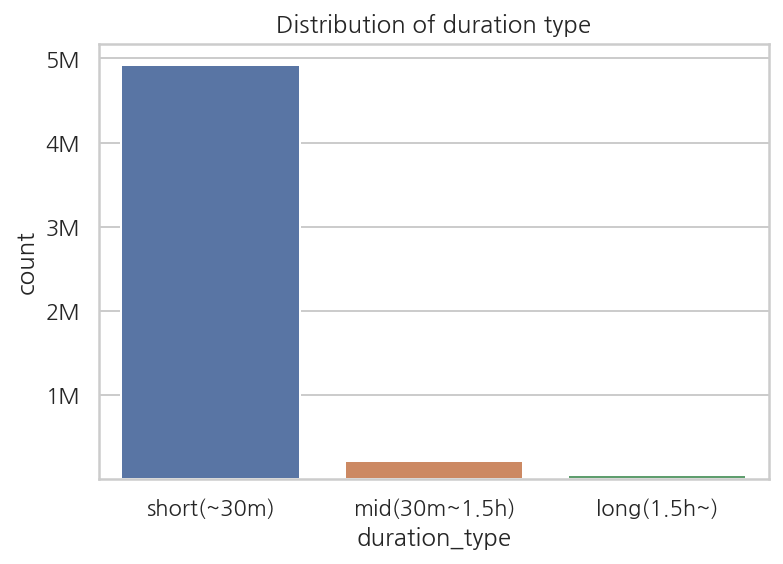

In [7]:
sb.countplot(data=bike, x='duration_type',order=['s','m','l'])
plt.xticks([0,1,2],['short(~30m)','mid(30m~1.5h)','long(1.5h~)'])
plt.yticks([1000000,2000000,3000000,4000000,5000000],['1M','2M','3M','4M','5M'])
plt.title('Distribution of duration type')
plt.show()

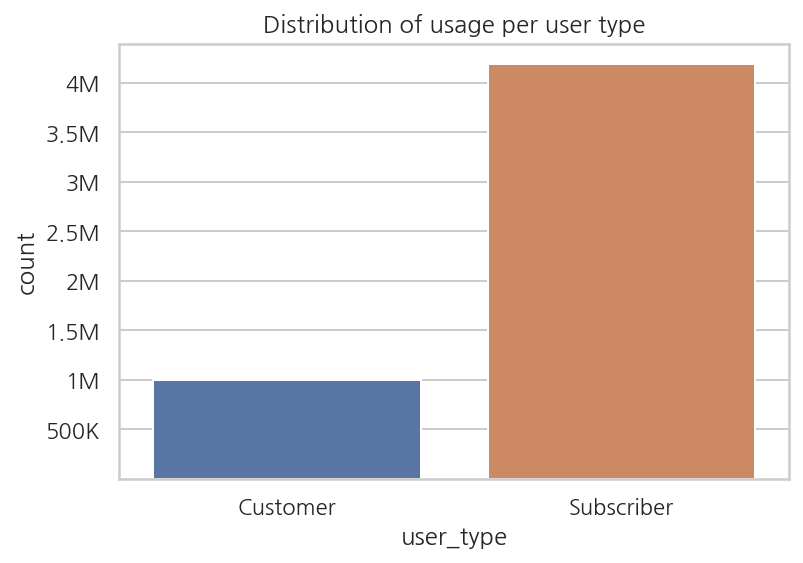

In [8]:
sb.countplot(data=bike,x='user_type')
plt.yticks([500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000],['500K','1M','1.5M','2M','2.5M','3M','3.5M','4M'])
plt.title('Distribution of usage per user type')
plt.show()

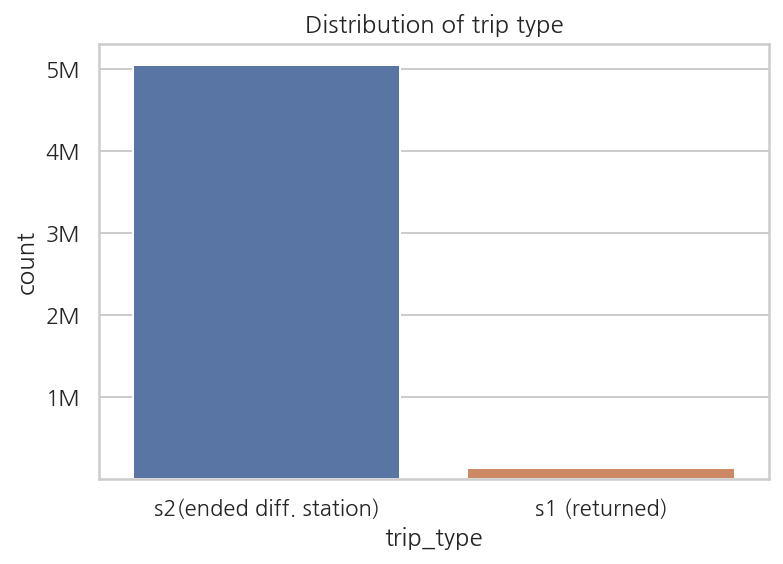

In [9]:
sb.countplot(data=bike,x='trip_type')
plt.xticks([0,1],['s2(ended diff. station)','s1 (returned)'])
plt.yticks([1000000,2000000,3000000,4000000,5000000],['1M','2M','3M','4M','5M'])
plt.title('Distribution of trip type')
plt.show()

## Monthly usage with duration type, user type

Usage is increasing year after year. Also there's seasonal trend which is higher usage in spring, summer, fall and lower in winter. It's hard to see the mid/long trip in the plot due to small amount comparatively but these longer trips reflect these trends as well. Subscriber's short trip usage is very higher than customer's short trip or mid/long trip of all user. Mid/long trip of customer looks like constantly being occured even very small number.

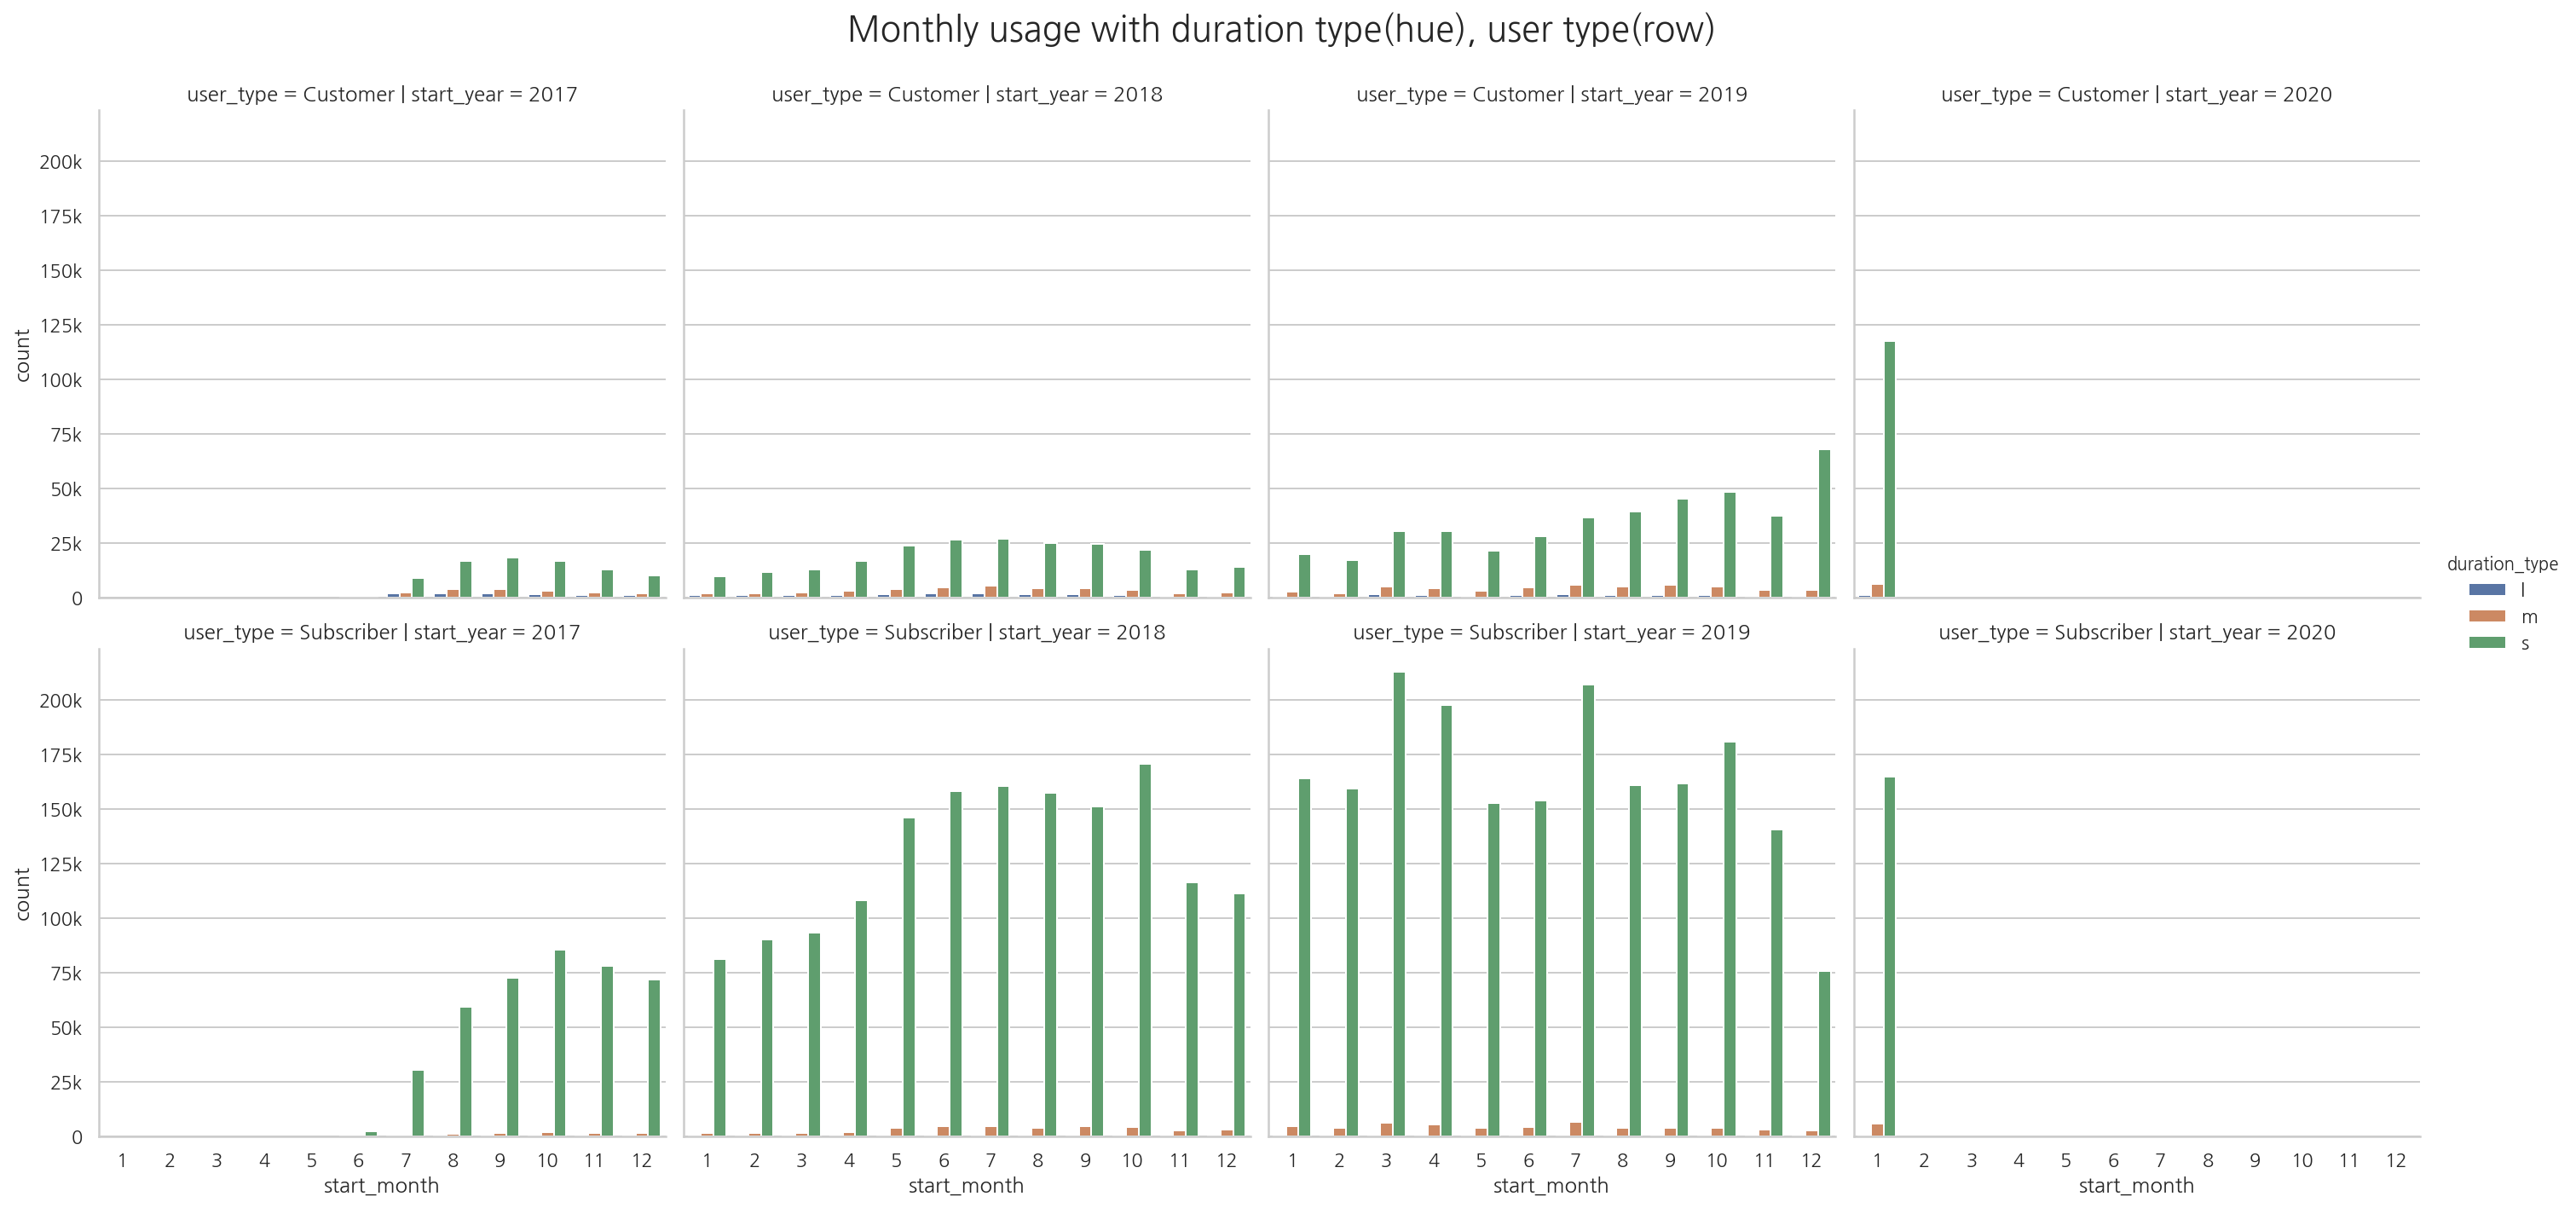

In [18]:
g=sb.catplot(data=bike,x='start_month',hue='duration_type',col='start_year',kind='count',row='user_type',)
g.set_yticklabels(labels=['0','25k','50k','75k','100k','125k','150k','175k','200k'])
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Monthly usage with duration type(hue), user type(row)',fontsize=20)
plt.show()

In [ ]:
# monthly usage by user type by duration type year by year
g=sb.catplot(data=bike,x='start_month',hue='user_type',col='start_year',kind='count',row='duration_type')
g.set_yticklabels(labels=['0','25k','50k','75k','100k','125k','150k','175k','200k'])
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Monthly usage with user type(hue), duration type(row)',fontsize=20)
g.set_titles('{row_name | start_year= col_val}')
plt.show()

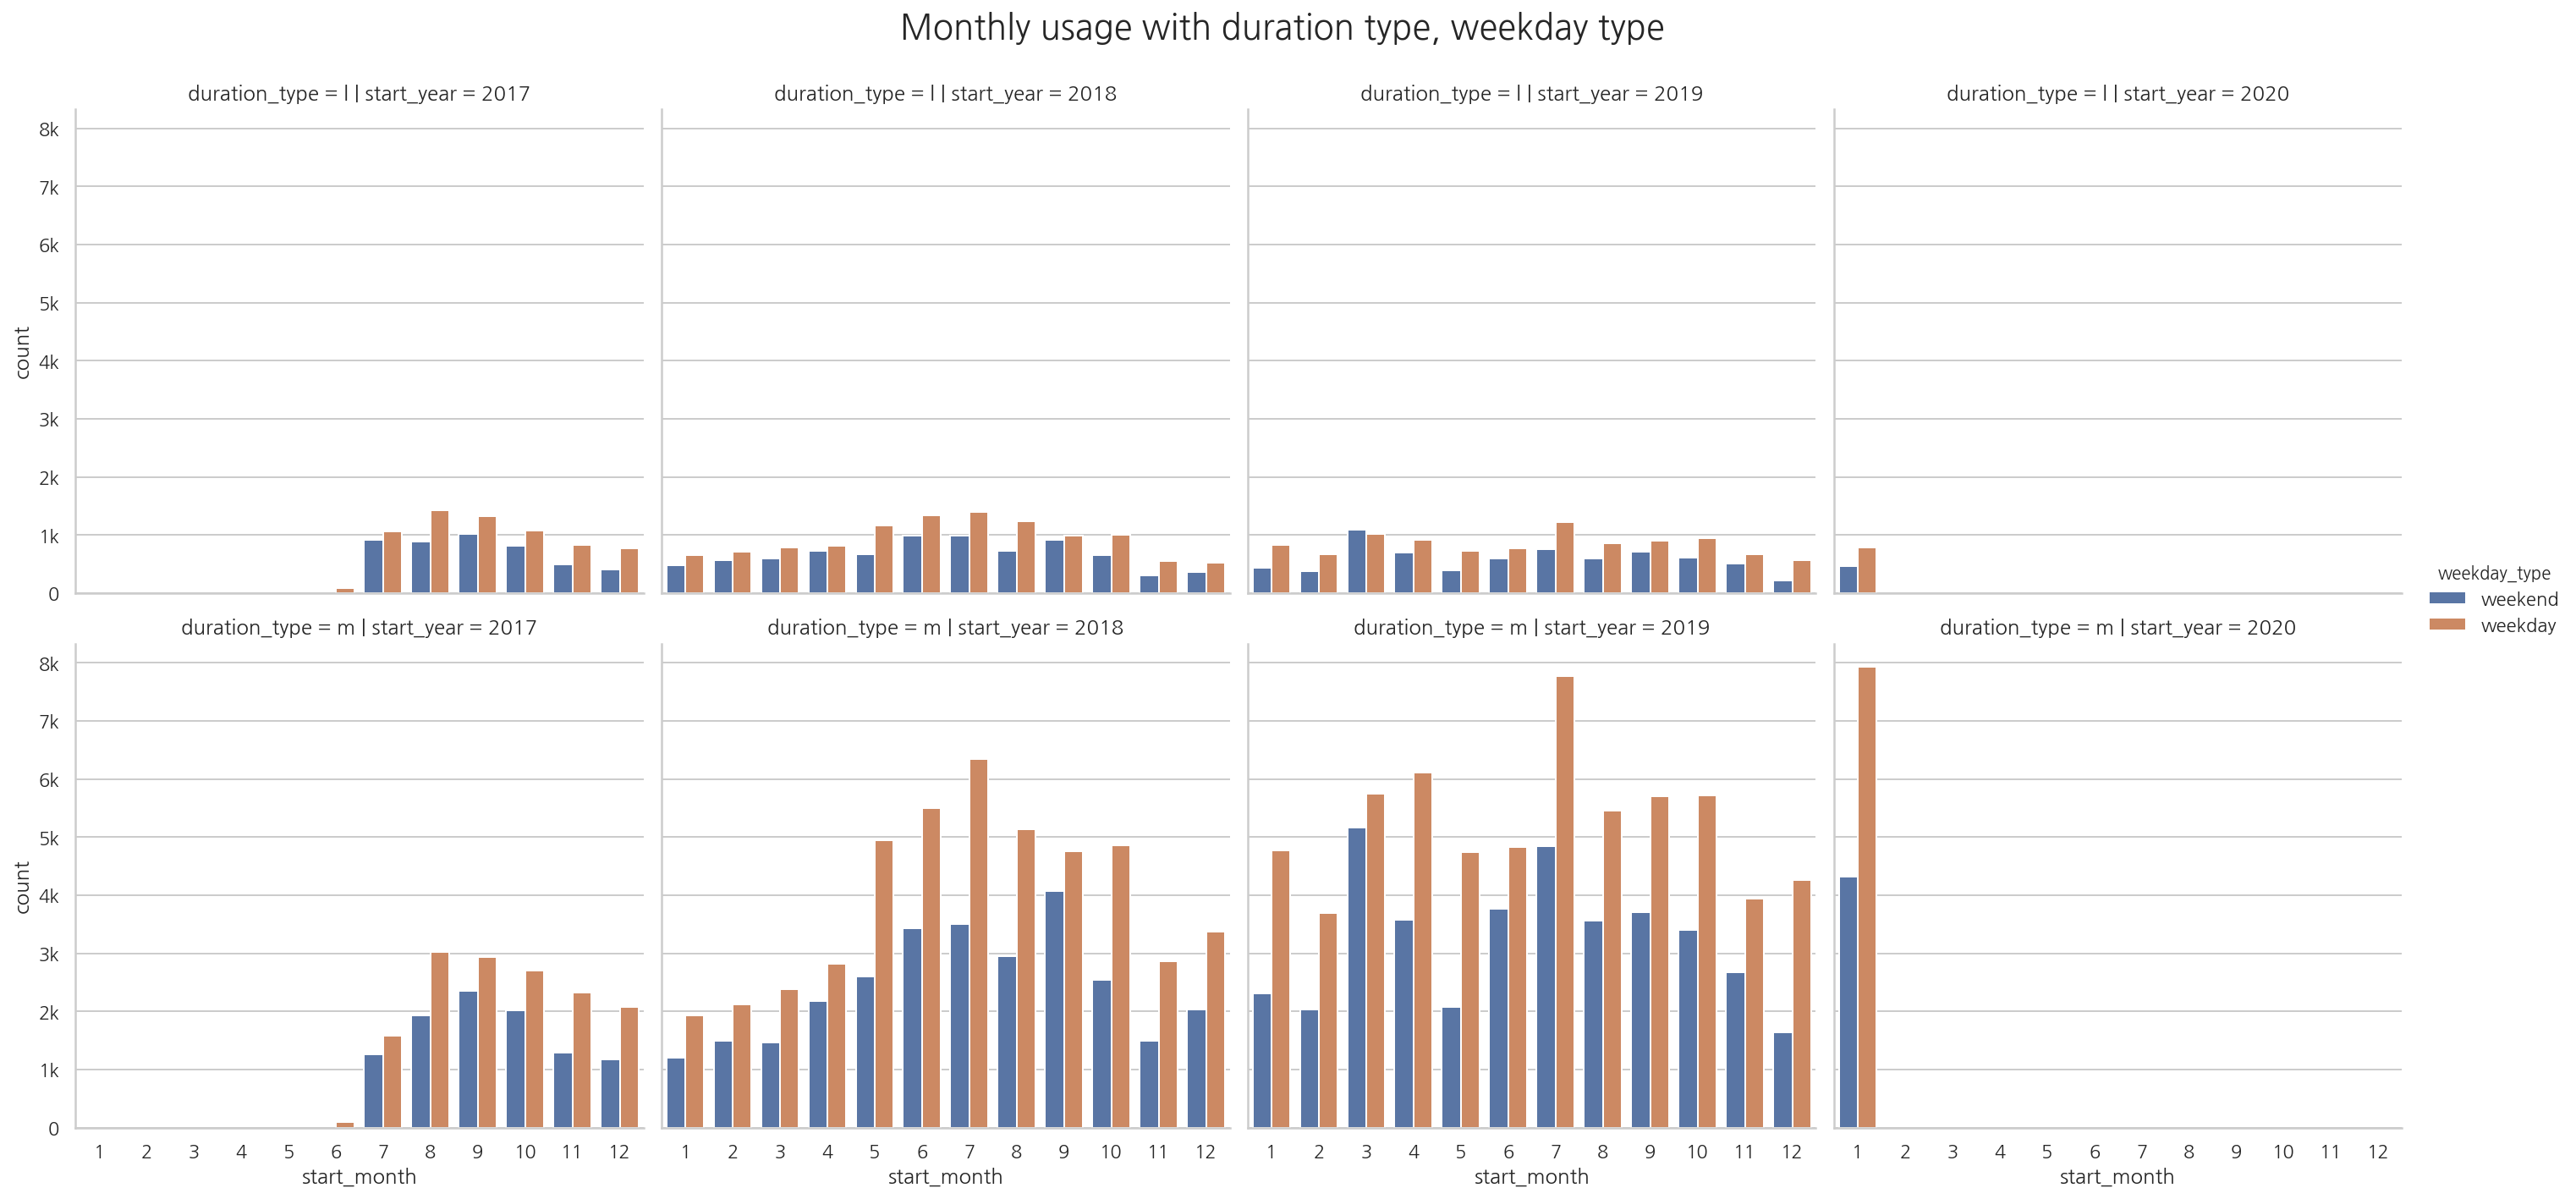

In [12]:
g=sb.catplot(data=bike.query('duration_type!="s"'), x='start_month',hue='weekday_type',col='start_year',row='duration_type',kind='count')
g.set_yticklabels(labels=['0','1k','2k','3k','4k','5k','6k','7k','8k'])
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Monthly usage with duration type, weekday type',fontsize=20)
plt.show()

## Hourly usage with weekday type, duration type

In this plot I can understand why subscriber's short trip was highly occured. Most subcribers ride bike to work commute during weekday due to it is bimodal shape. Some of subscribers uses bike as short trip on the weekend daylight time and it is not for work due to the plot is unimodal shape. Similarly casual user also uses bike to work commute but very samll number than subscriber. Mid trip is very small amount but it looks like constant trend in usage on the weekday and weekend which is daylight time pattern.

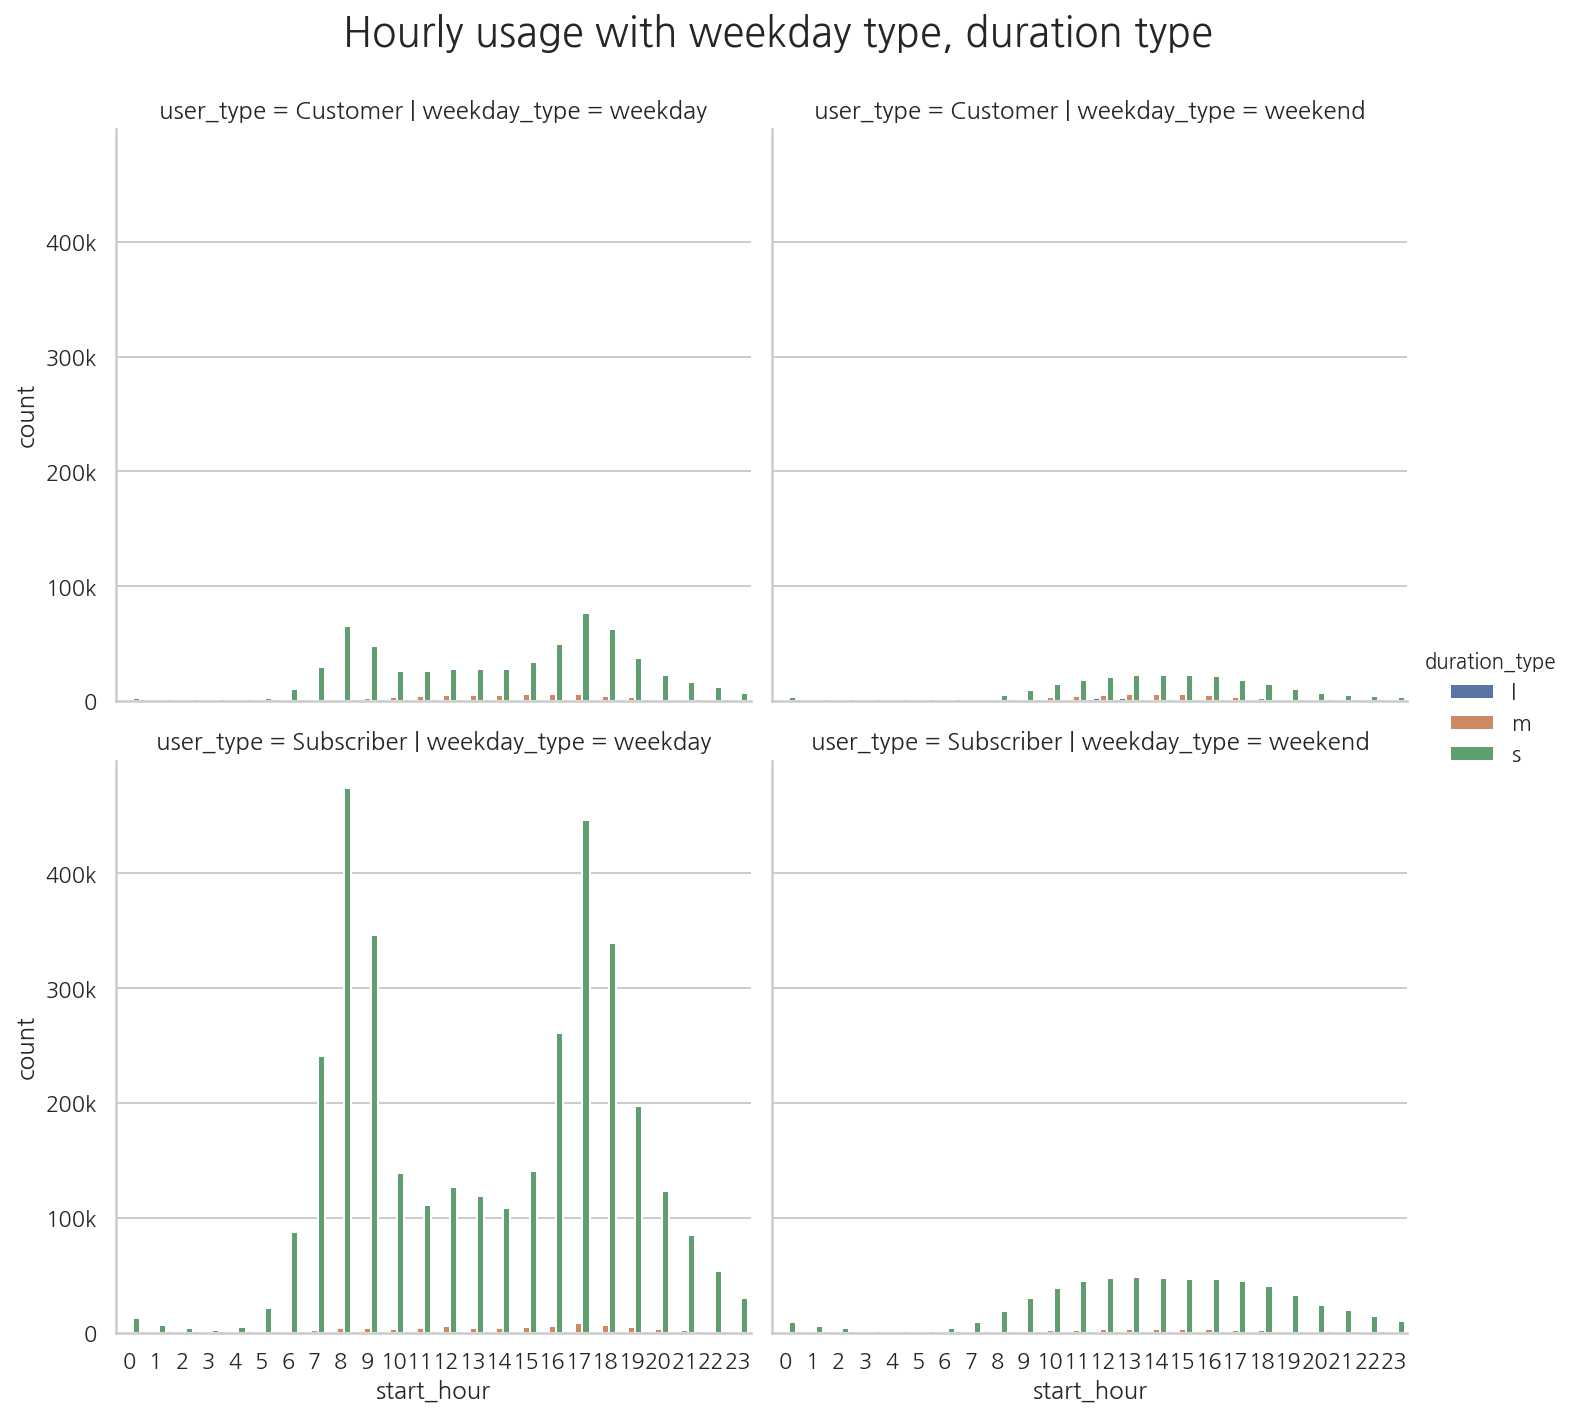

In [13]:
g=sb.catplot(data=bike,x='start_hour',hue='duration_type',kind='count', col='weekday_type',col_order=['weekday','weekend'],row='user_type')
g.set_yticklabels(['0','100k','200k','300k','400k'])
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Hourly usage with weekday type, duration type',fontsize=20)
plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!